# STA 141B - Lecture 4

January 13, 2022

### Announcements

* Group member list due next week: Jan 22 (sunday) 11:59pm
* hw1 due next Wednesday
* Survey
* Discussion session?


### Last time

* Modules and Packages
* Iteration: Loops, Comprehensions, and Generators expressions

### Topics

* NumPy and Pandas

### Data Sets

* Dogs (in repository)

### References

* Python for Data Analysis, Ch. 5, 10
* [Python Data Science Handbook][PDSH], Ch. 3

[PDSH]: https://jakevdp.github.io/PythonDataScienceHandbook/
[ProGit]: https://git-scm.com/book/

### Assignment operators

<img src="assigned.png">

### NumPy
NumPy is a Python package that provides tools for numerical computing (the name stands for "Numerical Python"). Since we're using Anaconda, NumPy is already installed.

NumPy is documented [here][link4].

[link4]: https://numpy.org/doc/stable/

In [1]:
import numpy as np

NumPy's core feature is the n-dimensional array, or ndarray. NumPy arrays are the basis for almost all of Python's scientific computing packages. They are the Python equivalent of R's built-in vectors.

NumPy arrays use reference semantics!

#### Creating NumPy Arrays

You can create NumPy arrays from lists:

In [2]:
np.array([1, 2, 3])

array([1, 2, 3])

A numpy array is a grid of values, all of __the same type__, and is indexed by a tuple of nonnegative integers. 

A list is the Python equivalent of an array, but is resizeable and can contain elements of different types.

In [3]:
x = np.array([1, 2, 3])
y = np.array((4.1, 5.2, 6.3))

In [ ]:
z = [2, 3, 4]
x + z # list + array = array
x + [2, 'apple', 3]
x + [2, 3]
x + [2, 3, 4, 5]

You can create multidimensional arrays, like matrices, from nested lists.

In [3]:
m = np.array([[1, 2, 3], [4, 5, 6]])
m

array([[1, 2, 3],
       [4, 5, 6]])

NumPy also provides several helper functions to create arrays. See the [documentation](https://numpy.org/doc/stable/user/basics.creation.html) for a full list.

As an example, np.arange() is the NumPy equivalent of range().

In [4]:
np.arange(10) # the same as np.array(range(10))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

A Python matrix is a specialized two-dimensional rectangular array of data stored in rows and columns 

In [11]:
a = np.matrix([[1, 2, 3], [4, 5, 6]]) 
a

matrix([[1, 2, 3],
        [4, 5, 6]])

In [12]:
type(a)

numpy.matrix

In [25]:
# you can do m - a 

There is no N-dimensional matrix in numpy, only N-dimensional array: see [this](https://numpy.org/doc/stable/reference/arrays.ndarray.html)

#### Inspecting Arrays

The array attributes .shape and .size contain information about the structure of the array.

In [15]:
x.shape  # like R's dim()

(3,)

In [16]:
m.shape

(2, 3)

In [17]:
x.size # like R's length()

3

In [18]:
m.size

6

In [19]:
type(m)

numpy.ndarray

In [22]:
a.shape

(2, 3)

The array attribute .dtype contains the data type of the array's elements.

In [26]:
x.dtype

dtype('int64')

In [29]:
x

array([1, 2, 3])

In [27]:
y.dtype

dtype('float64')

In [28]:
y

array([4.1, 5.2, 6.3])

See [here][link5] or [here][link6] for a complete list of Numpy data types.

[link5]: https://docs.scipy.org/doc/numpy-1.15.0/user/basics.types.html
[link6]: https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html#NumPy-Standard-Data-Types 

In [30]:
x + y

array([5.1, 7.2, 9.3])

In [31]:
(x+y).dtype

dtype('float64')

In [32]:
np.sin(x) # call functions

array([0.84147098, 0.90929743, 0.14112001])

#### Indexing

You can subset NumPy arrays with indexes or Boolean arrays. Again, this is similar to R.

Be careful! Python uses and and or to combine conditions, but NumPy uses & and |.

In [33]:
x[0]

1

In [34]:
x[0:2]

array([1, 2])

In [35]:
m[1,1]

5

In [36]:
m

array([[1, 2, 3],
       [4, 5, 6]])

In [38]:
x[x % 2 == 0] # true or false


array([False,  True, False])

In multidimensional arrays, separate indexes for each dimension with commas. The "bare" slice : selects everything in one dimension.

Be careful! When subsetting, remember to use : where you would use a __blank in $\mathsf{R}$__.

In [ ]:
m

In [ ]:
m[:,0]

What else can NumPy do?
NumPy also provides functions for:

<ul>
    <li>Linear algebra (multiplication, transposition, decomposition, ...)</li>
    <li>Random number generation</li>
    <li>Elementary statistics</li>
    <li>Signal processing</li>
    <li>And more...</li>
</ul>    
There isn't time to cover all of these in detail in lecture, but you can learn more from the documentation and references.

## Using NumPy for Monte Carlo Integration
### Example - estimate $\pi$ using Monte Carlo method

Consider a circle with radius 1 circumscribed by a square with side length 2.

The area of the circle is $\pi$, so for a uniform distribution on the square, the probability a point will fall in the circle is $\pi / 4$.

We can estimate the probability to estimate $\pi$.

In [5]:
# Estimate pi

import numpy as np

def estimate_pi(n):
    # First, we need to sample points (x, y) with x in (-1, 1) and y the same
    x = np.random.rand(n) # uniform distribution from 0 to 1
    y = np.random.rand(n)

    # Check which are in the circle
    in_circle = x**2 + y**2 <= 1

    # Estimate pi
    #sum(in_circle)
    num_inside = in_circle.sum()
    p_hat = num_inside / n
    return 4 * p_hat


# estimate_pi(1000)

# np.pi

# np.random.rand?

In [6]:
import random
random.seed(1)

# np.random.seed

log_n = np.linspace(start=0.5, stop=6, num=50)
n = 10**(log_n).astype(int)
pi_hat = [estimate_pi(i) for i in n]

n

array([      1,       1,       1,       1,       1,      10,      10,
            10,      10,      10,      10,      10,      10,      10,
           100,     100,     100,     100,     100,     100,     100,
           100,     100,    1000,    1000,    1000,    1000,    1000,
          1000,    1000,    1000,    1000,   10000,   10000,   10000,
         10000,   10000,   10000,   10000,   10000,   10000,  100000,
        100000,  100000,  100000,  100000,  100000,  100000,  100000,
       1000000])

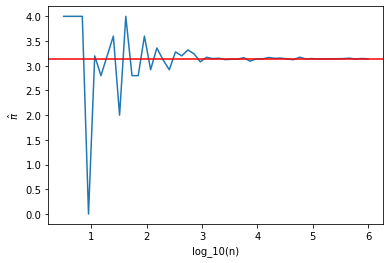

In [10]:
# make a plot

import matplotlib.pyplot as plt
plt.plot(log_n, pi_hat)
plt.axhline(y=np.pi, color='r', linestyle='-')
plt.xlabel("log_10(n)")
plt.ylabel("$\hat\pi$")
plt.show()

You can do more with plt, see [documentation](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)

## Pandas

Pandas is a Python package that provides tools for manipulating tabular data. The name "pandas" is short for "**PAN**el **DA**ta", an econometrics term. Since we're using Anaconda, Pandas is already installed.

Pandas is documented [here](http://pandas.pydata.org/pandas-docs/stable/).

In [11]:
import pandas as pd

### Series

A Pandas Series a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). It is a generalization of a NumPy array.

In addition to elements, every series includes an <b>index</b>.

In [12]:
x = pd.Series([1, 2, 3])
x

0    1
1    2
2    3
dtype: int64

A series can be indexed in all of the same ways as a NumPy array, but also by index values.

This means a series can also be used like an ordered dictionary.


So, can you add column/row names to a np.array? See [here](https://stackoverflow.com/questions/24168569/how-to-add-names-to-a-numpy-array-without-changing-its-dimension)

In [13]:
x[0:2]

0    1
1    2
dtype: int64

In [14]:
x = pd.Series([1, 2, 3], index = ["a", "b", "c"])
x

a    1
b    2
c    3
dtype: int64

In [15]:
x["a"]

1

In [18]:
x[0]

1

In [20]:
x["a":"b"] # careful, this is inclusive!

a    1
b    2
dtype: int64

In [24]:
# x = pd.Series([1, 2, 3], index = ["c", "b", "a"])
# x["a":"c"]

Series([], dtype: int64)

What if a series has integer indexes?

In [34]:
y = pd.Series([1, 2, 3], index = [10, 12, 14])
y

10    1
12    2
14    3
dtype: int64

In [32]:
# y[1] # ambiguous
# y[10]

1

For a indexing series (and as we'll see later, also data frames):

* `[ ]` is by position, name, or condition. **Exception:** for an integer index it's by name or condition only.
* `.iloc[ ]` is by position
* `.loc[ ]` is by name or condition

In [33]:
y.iloc[0]

1

In [35]:
y.loc[10]

1

In [37]:
z = pd.Series([1, 2, 3, 4], index = [3j, 2j, 1j, -1j])
z

 0.0+3.0j    1
 0.0+2.0j    2
 0.0+1.0j    3
-0.0-1.0j    4
dtype: int64

In [40]:
z[3j]
z[-1j]

4

In [39]:
z.index

Index([3j, 2j, 1j, (-0-1j)], dtype='object')

In [41]:
z.index = [0, 1, 2, 3] # change index

In [42]:
z

0    1
1    2
2    3
3    4
dtype: int64

### Data Frames

A data frame is a table or a two-dimensional array-like structure in which each column contains values of one variable and each row contains one set of values from each column.

It represents tabular data as a collection of Series.

In [43]:
df = pd.DataFrame({"x": [1, 2, 3], "y": ["a", "b", "c"]})
df

,x,y
0,1,a
1,2,b
2,3,c


Data frames support the similar indexing methods as series. However, for indexing with `[ ]`,

* Scalar values get columns by name
* Conditions or slices get rows

In [55]:
df.iloc[0, 0]

1

In [47]:
df["x"]

0    1
1    2
2    3
Name: x, dtype: int64

In [48]:
df["y"]

0    a
1    b
2    c
Name: y, dtype: object

In [49]:
df[0] # scalars always look up columns by name

KeyError: 0

In [50]:
# condition
df.loc[:, "x"]

,x,y
0,1,a
1,2,b
2,3,c


In [60]:
df[df["x"] > 2] 

,x,y
2,3,c


In [61]:
df.loc[df["x"] > 2, :]

,x,y
2,3,c


More indexing and selection data using pandas can be found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-slicing-with-labels)

In [51]:
df.shape

(3, 2)

In [52]:
df.size

6

In [67]:
type(df)

pandas.core.frame.DataFrame

In [53]:
df.dtypes

x     int64
y    object
dtype: object

### Missing Data

Pandas represents missing data with `NaN` and `None`, but these values do not exclusively mean missing data. For instance, `NaN` stands for "Not a Number" and is also the result of undefined computations. Pay attention to your data and code to determine whether values are missing or have some other meaning.

You can create `NaN` values with NumPy.

In [54]:
np.nan

nan

In [55]:
df = pd.DataFrame({"x": [1, np.nan, 2], "y": np.arange(3), "z": ["x", "y", None]})
df

,x,y,z
0,1.0,0,x
1,NaN,1,y
2,2.0,2,None


Use the `.isna()` or `.isnull()` methods to detect missing values.

In [56]:
df.isna()

,x,y,z
0,False,False,False
1,True,False,False
2,False,False,True


In [57]:
df.isnull()

,x,y,z
0,False,False,False
1,True,False,False
2,False,False,True


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2 non-null      float64
 1   y       3 non-null      int64  
 2   z       2 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 200.0+ bytes


In [69]:
(~df.isna()).sum().sum() # number not missing

7

In [70]:
df.notna().sum().sum() # number not missing

7

In [72]:
df.sum().sum()

6.0

### Data Alignment

Pandas supports vectorized operations, but elements are <b>automatically</b> aligned by index. **Beware!!** This is a major difference compared to R.

In [78]:
x = pd.Series([1, 2, 3], index = ["a", "b", "c"])
y = pd.Series([1, 2, 3, 1], index = ["b", "a", "d", "c"])

x

a    1
b    2
c    3
dtype: int64

In [74]:
y

b    1
a    2
d    3
c    1
dtype: int64

In [75]:
x * y

a    2.0
b    2.0
c    3.0
d    NaN
dtype: float64

You can use the `.reset_index()` method to reset the indexes on a series or data frame.

In [79]:
x.reset_index() # keep old index as a new column

# x.reset_index(drop = True) # throw away the old index

,index,0
0,a,1
1,b,2
2,c,3


### Reading Data

Pandas provides functions for reading (and writing) a variety of common formats. Most of their names begin with `read_`. For instance, we can read the dogs data from a CSV file:

In [82]:
dogs = pd.read_csv("dogs_full.csv")

In [84]:
# dogs.head()
dogs.head(n = 6)

,breed,group,datadog,popularity_all,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,grooming,kids,megarank_kids,megarank,size,weight,height
0,Border Collie,herding,3.64,45,39.0,20143.0,1.0,12.52,2.0,623.0,324.0,weekly,low,1.0,29.0,medium,NaN,20.0
1,Border Terrier,terrier,3.61,80,61.0,22638.0,30.0,14.00,0.0,833.0,324.0,weekly,high,2.0,1.0,small,13.5,NaN
2,Brittany,sporting,3.54,30,30.0,22589.0,19.0,12.92,0.0,618.0,466.0,weekly,medium,3.0,11.0,medium,35.0,19.0
3,Cairn Terrier,terrier,3.53,59,48.0,21992.0,35.0,13.84,2.0,435.0,324.0,weekly,high,4.0,2.0,small,14.0,10.0
4,Welsh Springer Spaniel,sporting,3.34,130,81.0,20224.0,31.0,12.49,1.0,750.0,324.0,weekly,high,5.0,4.0,medium,NaN,18.0
5,English Cocker Spaniel,sporting,3.33,63,51.0,18993.0,18.0,11.66,0.0,800.0,324.0,weekly,high,6.0,5.0,medium,30.0,16.0


In [85]:
dogs.head(3)

,breed,group,datadog,popularity_all,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,grooming,kids,megarank_kids,megarank,size,weight,height
0,Border Collie,herding,3.64,45,39.0,20143.0,1.0,12.52,2.0,623.0,324.0,weekly,low,1.0,29.0,medium,NaN,20.0
1,Border Terrier,terrier,3.61,80,61.0,22638.0,30.0,14.00,0.0,833.0,324.0,weekly,high,2.0,1.0,small,13.5,NaN
2,Brittany,sporting,3.54,30,30.0,22589.0,19.0,12.92,0.0,618.0,466.0,weekly,medium,3.0,11.0,medium,35.0,19.0


In [86]:
dogs.tail()

,breed,group,datadog,popularity_all,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,grooming,kids,megarank_kids,megarank,size,weight,height
167,Weimaraner,sporting,NaN,32,NaN,NaN,21.0,NaN,1.0,562.0,NaN,weekly,high,NaN,NaN,large,NaN,25.0
168,Welsh Terrier,terrier,NaN,99,NaN,NaN,53.0,NaN,0.0,843.0,NaN,weekly,high,NaN,NaN,small,20.0,15.0
169,Wire Fox Terrier,terrier,NaN,100,NaN,NaN,51.0,13.17,0.0,668.0,NaN,NaN,NaN,NaN,NaN,small,17.5,15.0
170,Wirehaired Pointing Griffon,sporting,NaN,92,NaN,NaN,46.0,8.80,0.0,755.0,NaN,NaN,NaN,NaN,NaN,medium,NaN,22.0
171,Xoloitzcuintli,non-sporting,NaN,155,NaN,NaN,NaN,NaN,NaN,717.0,NaN,NaN,NaN,NaN,NaN,medium,NaN,16.5


### Inspecting Data

Series and data frames provide many of the same methods and attributes as NumPy arrays.

For a data frame, the `.dtypes` attribute gives the column types.

The type "object" means some non-numeric Python object, often a string.

In [87]:
dogs.dtypes

breed                 object
group                 object
datadog              float64
popularity_all         int64
popularity           float64
lifetime_cost        float64
intelligence_rank    float64
longevity            float64
ailments             float64
price                float64
food_cost            float64
grooming              object
kids                  object
megarank_kids        float64
megarank             float64
size                  object
weight               float64
height               float64
dtype: object

There are also several methods for quickly summarizing data.

In [88]:
dogs.describe()

,datadog,popularity_all,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,megarank_kids,megarank,weight,height
count,87.000000,172.000000,87.000000,91.000000,132.000000,135.000000,148.000000,146.000000,87.000000,87.000000,87.000000,86.00000,159.000000
mean,2.603678,87.122093,44.000000,19819.538462,40.924242,10.956741,1.216216,876.815068,489.597701,43.954023,43.942529,44.97093,19.089623
std,0.570288,50.205335,25.258662,3102.475382,19.603560,1.995742,1.549810,461.172524,204.266894,25.288065,25.278153,35.52707,6.012400
min,0.990000,1.000000,1.000000,12653.000000,1.000000,6.290000,0.000000,283.000000,270.000000,1.000000,1.000000,5.00000,5.000000
25%,2.185000,43.750000,22.500000,17816.500000,27.000000,9.700000,0.000000,587.250000,324.000000,22.500000,22.500000,17.50000,14.000000
50%,2.710000,87.500000,44.000000,20087.000000,42.000000,11.290000,1.000000,795.000000,466.000000,44.000000,44.000000,35.00000,19.000000
75%,3.035000,130.250000,65.500000,21798.000000,54.250000,12.365000,2.000000,1042.250000,466.000000,65.500000,65.500000,62.50000,24.125000
max,3.640000,173.000000,87.000000,26686.000000,80.000000,16.500000,9.000000,3460.000000,1349.000000,87.000000,87.000000,175.00000,32.000000


In [90]:
# First, get the string columns ("object"), then describe
dogs.select_dtypes(include = ["object"]).describe()
dogs.select_dtypes(include = ["float64"]).describe()

,datadog,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,megarank_kids,megarank,weight,height
count,87.000000,87.000000,91.000000,132.000000,135.000000,148.000000,146.000000,87.000000,87.000000,87.000000,86.00000,159.000000
mean,2.603678,44.000000,19819.538462,40.924242,10.956741,1.216216,876.815068,489.597701,43.954023,43.942529,44.97093,19.089623
std,0.570288,25.258662,3102.475382,19.603560,1.995742,1.549810,461.172524,204.266894,25.288065,25.278153,35.52707,6.012400
min,0.990000,1.000000,12653.000000,1.000000,6.290000,0.000000,283.000000,270.000000,1.000000,1.000000,5.00000,5.000000
25%,2.185000,22.500000,17816.500000,27.000000,9.700000,0.000000,587.250000,324.000000,22.500000,22.500000,17.50000,14.000000
50%,2.710000,44.000000,20087.000000,42.000000,11.290000,1.000000,795.000000,466.000000,44.000000,44.000000,35.00000,19.000000
75%,3.035000,65.500000,21798.000000,54.250000,12.365000,2.000000,1042.250000,466.000000,65.500000,65.500000,62.50000,24.125000
max,3.640000,87.000000,26686.000000,80.000000,16.500000,9.000000,3460.000000,1349.000000,87.000000,87.000000,175.00000,32.000000


### Aggregation

Pandas also provides several methods for aggregating data, such as `.mean()`, `.median()`, `.std()`, and `.value_counts()`. They ignore missing values by default.

In [91]:
dogs.median()

datadog                  2.71
popularity_all          87.50
popularity              44.00
lifetime_cost        20087.00
intelligence_rank       42.00
longevity               11.29
ailments                 1.00
price                  795.00
food_cost              466.00
megarank_kids           44.00
megarank                44.00
weight                  35.00
height                  19.00
dtype: float64

In [92]:
dogs["price"].median()

795.0

In [93]:
dogs["group"].value_counts() # like R's table() with 1 arg

sporting        28
terrier         28
working         27
hound           26
herding         25
non-sporting    19
toy             19
Name: group, dtype: int64

For counting one group against another (crosstabulating), use `pd.crosstab()`.

In [95]:
pd.crosstab(dogs["group"], dogs["kids"]) # like R's table() with 2+ arg

kids,high,low,medium
group,,,
herding,11,2,3
hound,8,1,6
non-sporting,7,0,4
sporting,17,1,3
terrier,9,0,9
toy,3,5,5
working,12,1,5


### Applying Functions

You can also use Pandas to apply your own aggregation functions to columns or rows.

* `.apply()` applies a function column-by-column or row-by-row.
* `.applymap()` applies a function element-by-element.

This is another way to vectorizing code, but only works for data frame.


In [103]:
def spread(x):
    # Input is a single column (or row)
    return x.max() - x.min()
    
dogs.select_dtypes(include = ["float64", "int64"]).apply(spread)

datadog                  2.65
popularity_all         172.00
popularity              86.00
lifetime_cost        14033.00
intelligence_rank       79.00
longevity               10.21
ailments                 9.00
price                 3177.00
food_cost             1079.00
megarank_kids           86.00
megarank                86.00
weight                 170.00
height                  27.00
dtype: float64

### Grouping

Use the `.groupby()` method to group data before computing aggregate statistics.

In [104]:
dogs.head()

,breed,group,datadog,popularity_all,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,grooming,kids,megarank_kids,megarank,size,weight,height
0,Border Collie,herding,3.64,45,39.0,20143.0,1.0,12.52,2.0,623.0,324.0,weekly,low,1.0,29.0,medium,NaN,20.0
1,Border Terrier,terrier,3.61,80,61.0,22638.0,30.0,14.00,0.0,833.0,324.0,weekly,high,2.0,1.0,small,13.5,NaN
2,Brittany,sporting,3.54,30,30.0,22589.0,19.0,12.92,0.0,618.0,466.0,weekly,medium,3.0,11.0,medium,35.0,19.0
3,Cairn Terrier,terrier,3.53,59,48.0,21992.0,35.0,13.84,2.0,435.0,324.0,weekly,high,4.0,2.0,small,14.0,10.0
4,Welsh Springer Spaniel,sporting,3.34,130,81.0,20224.0,31.0,12.49,1.0,750.0,324.0,weekly,high,5.0,4.0,medium,NaN,18.0


In [106]:
dogs.groupby("group").mean()

,datadog,popularity_all,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,megarank_kids,megarank,weight,height
group,,,,,,,,,,,,,
herding,2.732000,99.880000,43.500000,20691.818182,21.812500,11.728824,2.235294,814.941176,490.900000,40.300000,42.600000,36.666667,19.730000
hound,2.373077,104.769231,52.692308,19365.769231,54.904762,10.793529,0.833333,746.571429,514.538462,54.769231,56.153846,63.833333,22.543478
non-sporting,2.488000,82.210526,38.600000,19315.800000,46.714286,10.976000,1.352941,930.500000,409.200000,46.300000,42.800000,27.928571,14.984375
sporting,2.976000,87.428571,46.066667,20299.312500,27.782609,10.895600,1.040000,760.125000,510.866667,27.466667,17.266667,51.966667,21.276786
terrier,2.787500,100.250000,58.416667,20504.333333,44.750000,11.480000,0.653846,905.760000,389.916667,37.166667,39.583333,23.413043,13.780000
toy,2.805385,54.052632,36.769231,19506.076923,48.647059,11.672941,1.000000,686.894737,343.230769,35.076923,49.000000,9.818182,10.533333
working,2.065000,71.111111,32.285714,19164.687500,41.529412,9.465909,1.772727,1235.708333,721.500000,66.571429,62.000000,105.000000,25.388889


By default, the groups become the index. You can keep them as regular columns by setting `as_index = False` when grouping.

In [107]:
dogs.groupby("group", as_index = False).mean()

,group,datadog,popularity_all,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,megarank_kids,megarank,weight,height
0,herding,2.732000,99.880000,43.500000,20691.818182,21.812500,11.728824,2.235294,814.941176,490.900000,40.300000,42.600000,36.666667,19.730000
1,hound,2.373077,104.769231,52.692308,19365.769231,54.904762,10.793529,0.833333,746.571429,514.538462,54.769231,56.153846,63.833333,22.543478
2,non-sporting,2.488000,82.210526,38.600000,19315.800000,46.714286,10.976000,1.352941,930.500000,409.200000,46.300000,42.800000,27.928571,14.984375
3,sporting,2.976000,87.428571,46.066667,20299.312500,27.782609,10.895600,1.040000,760.125000,510.866667,27.466667,17.266667,51.966667,21.276786
4,terrier,2.787500,100.250000,58.416667,20504.333333,44.750000,11.480000,0.653846,905.760000,389.916667,37.166667,39.583333,23.413043,13.780000
5,toy,2.805385,54.052632,36.769231,19506.076923,48.647059,11.672941,1.000000,686.894737,343.230769,35.076923,49.000000,9.818182,10.533333
6,working,2.065000,71.111111,32.285714,19164.687500,41.529412,9.465909,1.772727,1235.708333,721.500000,66.571429,62.000000,105.000000,25.388889


You can group by multiple columns.

In [108]:
dogs.groupby(["group", "kids"]).mean()

datadog  popularity_all  popularity  lifetime_cost  \
group        kids                                                          
herding      high    2.576667       96.000000   53.500000   21171.142857   
             low     3.445000       52.500000   44.000000   20269.000000   
             medium  2.485000       61.666667   13.000000   19437.000000   
hound        high    2.295000       98.250000   54.166667   20165.500000   
             low     3.190000        9.000000    9.000000   20113.000000   
             medium  2.315000       82.500000   58.500000   18441.500000   
non-sporting high    2.723333       70.714286   42.333333   20368.000000   
             medium  2.135000       42.000000   33.000000   17737.500000   
sporting     high    2.935714       70.176471   47.214286   20146.666667   
             low          NaN      161.000000         NaN            NaN   
             medium  3.540000      108.333333   30.000000   22589.000000   
terrier      high    3.024000       98.000000   57.200000   21680.600000   
             medium  2.618571       89.111111   59.285714   19664.142857   
toy          high    2.740000       19.333333   19.333333   19439.333333   
             low     2.844000       36.800000   30.800000   20409.800000   
             medium  2.806000       77.400000   53.200000   18642.400000   
working      high    1.992222       53.333333   30.111111   18153.272727   
             low     1.950000       47.000000   41.000000   20994.000000   
             medium  2.257500       57.400000   35.000000   21488.750000   

                     intelligence_rank  longevity  ailments        price  \
group        kids                                                          
herding      high            26.125000  11.702000  2.111111   848.875000   
             low              5.500000  12.095000  1.500000   576.500000   
             medium          22.500000  10.936667  5.000000   692.500000   
hound        high            56.625000  10.678571  1.000000  1028.714286   
             low             49.000000  12.630000  2.000000   423.000000   
             medium          61.666667  10.535000  1.166667   841.000000   
non-sporting high            50.428571  11.844286  0.571429   896.333333   
             medium          54.750000   9.890000  2.250000  1308.750000   
sporting     high            24.125000  10.986250  1.470588   705.875000   
             low                   NaN  11.170000  0.000000          NaN   
             medium          31.333333  11.190000  0.000000   618.000000   
terrier      high            48.875000  12.213333  0.750000   800.000000   
             medium          43.250000  11.391429  0.888889  1042.555556   
toy          high            57.000000  11.830000  1.333333   689.666667   
             low             54.400000  12.674000  1.200000   785.600000   
             medium          37.400000  11.150000  1.400000   746.000000   
working      high            48.444444   8.947273  2.300000  1292.083333   
             low             54.000000  10.160000  1.000000  1202.000000   
             medium          23.000000  10.172000  2.500000   982.000000   

                      food_cost  megarank_kids   megarank      weight  \
group        kids                                                       
herding      high    531.166667      48.833333  37.500000   31.000000   
             low     395.000000       5.000000  40.500000         NaN   
             medium  466.000000      50.000000  60.000000         NaN   
hound        high    601.500000      60.666667  49.166667   72.500000   
             low     324.000000      14.000000  54.000000   24.000000   
             medium  459.333333      55.666667  63.500000   67.000000   
non-sporting high    395.000000      39.000000  27.666667   18.000000   
             medium  430.500000      57.250000  65.500000   34.500000   
sporting     high    514.071429      29.214286  17.714286   55.791667   
             low         

On groups, the `.apply()` method computes group-by-group. It is the most general form of two other methods:

* `.agg()`, which applies a function to each group to compute summary statistics
* `.transform()`, which applies a function to each group to compute transformations (such as standardization)

In [ ]:
def f(x):
    # Like R's browser() function, the breakpoint() function runs the debugger.
    # The debugger is especially useful for checking what's going on in a function.
    breakpoint()
    
dogs.groupby("group").apply(f)

## Static Visualizations in Python

Discussion and part of the next lecture will cover the plotnine package, an implementation of ggplot2 for Python. Unlike packages we've seen so far, plotnine is not included with Anaconda. To install the package:

* On Windows, run `conda install -c conda-forge plotnine` in an Anaconda Prompt (find it in the start menu)
* On MacOS or Linux, run `conda install -c conda-forge plotnine` in the Terminal

You may have to restart Jupyter after installing. To test your installation, try running

In [2]:
import plotnine

plotnine.__version__

'0.5.1'

## More About Packages and Modules

Which of the built-in modules are important?

Module      | Description
----------- | -----------
sys         | info about Python (version, etc)
pdb         | Python debugger
pathlib     | tools for file paths
collections | additional data structures
string      | string processing
re          | regular expressions
datetime    | date processing
urlparse    | tools for URLs
itertools   | tools for iterators
functools   | tools for functions

Python's built-in `math` and `statistics` modules are missing features we need for serious scientific computing, so we use the "SciPy Stack" instead.

The SciPy Stack is a collection of packages for scientific computing (marked with a `*` below). Most scientists working in Python use the SciPy Stack. The 3 most important packages in the stack are:

Package      | Description
------------ | -----------
numpy\*      | arrays, matrices, math/stat functions
scipy\*      | additional math/stat functions
pandas\*     | data frames

There are also several packages available for creating static plots. We'll see these soon:

Package      | Description
------------ | -----------
matplotlib\* | visualizations
seaborn      | "statistical" visualizations
plotnine     | ggplot2 for Python

Finally, there are many other packages we may use for specific statistical tasks. Some of these are:

Package      | Description
------------ | -----------
requests     | web (HTTP) requests
lxml         | web page parsing (XML & HTML)
beatifulsoup | web page parsing (HTML)
nltk         | natural language processing
spacy        | natural language processing
textblob     | natural language processing
statsmodels  | classical statistical models
scikit-learn | machine learning models
pillow       | image processing
scikit-image | image processing
opencv       | image processing